In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
######Objective 1: To gather and preprocess comprehensive data on soil and moisture conditions using existing IoT 
#############      datasets and simulators.


In [3]:
data= pd.read_csv("C:\\Users\\RAJESH KUMAR\\Documents\\irrigation system\\data.csv")

In [4]:
data.head()

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1


In [5]:
data.describe()

,moisture,temp,pump
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   crop      200 non-null    object
 1   moisture  200 non-null    int64 
 2   temp      200 non-null    int64 
 3   pump      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
data.isnull().sum()

crop        0
moisture    0
temp        0
pump        0
dtype: int64

In [8]:
data.crop.unique()

array(['cotton'], dtype=object)

In [9]:
data.pump.unique()

array([1, 0], dtype=int64)

In [10]:
numeric_columns = ['moisture','temp']

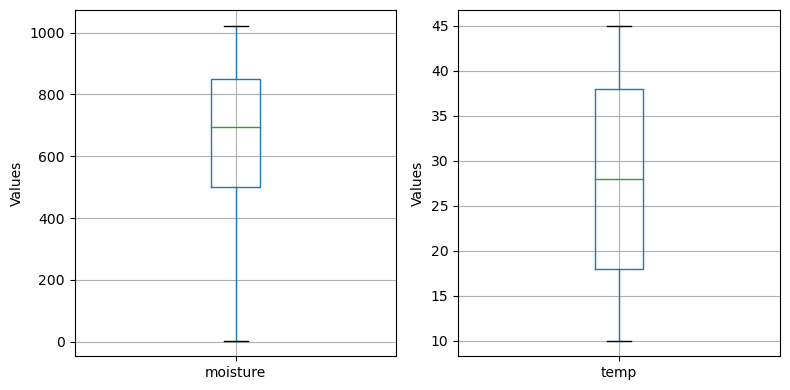

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(8, 4))

for i, column in enumerate(numeric_columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_ylabel('Values')

plt.tight_layout()
plt.show()

In [12]:
#### create simulated dataset

In [13]:
# Define the statistics
statistics = {
    'moisture': {'mean': 633.085, 'std': 279.077118},
    'temp': {'mean': 27.75, 'std': 10.869602},

}

# Define the count
count = 200

In [14]:
# Generate random data
simulated_data = {}
for column, params in statistics.items():
    mean = params['mean']
    std = params['std']
    simulated_data[column] = np.random.normal(mean, std, count)

In [15]:
import random

In [16]:
# Create categorical columns
crop_options = ['cotton'] * count
pump_options =[random.randint(0, 1) for _ in range(count)]

In [17]:
# Create DataFrame
simulated_data = pd.DataFrame({
    'crop': crop_options,
    **simulated_data,
    'pump': pump_options,
})

In [18]:
simulated_data['moisture'] = simulated_data['moisture'].astype(int)
simulated_data['temp'] = simulated_data['temp'].astype(int)

In [19]:
##### simulated dataset
print(simulated_data)

       crop  moisture  temp  pump
0    cotton       933    22     1
1    cotton       847    37     0
2    cotton       306    19     0
3    cotton        62    37     1
4    cotton       563    23     1
..      ...       ...   ...   ...
195  cotton       672    40     1
196  cotton      1012    30     0
197  cotton       713    20     1
198  cotton      1018    26     0
199  cotton       532    43     0

[200 rows x 4 columns]


In [20]:
#### IOT dataset
print(data)

       crop  moisture  temp  pump
0    cotton       638    16     1
1    cotton       522    18     1
2    cotton       741    22     1
3    cotton       798    32     1
4    cotton       690    28     1
..      ...       ...   ...   ...
195  cotton       941    13     1
196  cotton       902    45     1
197  cotton       894    42     1
198  cotton      1022    45     1
199  cotton       979    10     1

[200 rows x 4 columns]


In [21]:
### Research Question 1: How can existing IoT datasets and simulators be synergistically utilized to gather and preprocess 
######                  data on soil and moisture conditions for enhancing crop production?

In [22]:
##    Create new features or transformations(feature engineering)
##    Combine real-world data with simulated data to create a more comprehensive dataset (MERGING)
##    Explore correlations between soil properties, moisture levels, and crop growth.(EDA)


In [23]:
##################################################################################################

In [24]:
##  Objective 2: To apply machine learning techniques on the gathered data to predict optimal crop yield conditions based 
##               on soil and moisture parameters.


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score

In [70]:
# Concatenate the DataFrames vertically
merged_df = pd.concat([data, simulated_data], ignore_index=True)

In [71]:
print(merged_df)

       crop  moisture  temp  pump
0    cotton       638    16     1
1    cotton       522    18     1
2    cotton       741    22     1
3    cotton       798    32     1
4    cotton       690    28     1
..      ...       ...   ...   ...
395  cotton       672    40     1
396  cotton      1012    30     0
397  cotton       713    20     1
398  cotton      1018    26     0
399  cotton       532    43     0

[400 rows x 4 columns]


In [72]:
X = merged_df[['moisture', 'temp']]
y = merged_df['pump']

In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Build and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
# Predict using Random Forest model
rf_predictions = rf_model.predict(X_test)

In [76]:
# Calculate accuracy for Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculate precision
precision = precision_score(y_test, rf_predictions)

# Calculate F1-score
f1 = f1_score(y_test, rf_predictions)


In [77]:
# Print the results
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

Random Forest Accuracy: 0.76
Precision: 0.80
F1 Score: 0.81


In [78]:
# Build and train k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [79]:
# Predict using k-Nearest Neighbors model
knn_predictions = knn_model.predict(X_test)

In [80]:
# Calculate accuracy for k-Nearest Neighbors model
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Calculate precision
precision = precision_score(y_test, knn_predictions)

# Calculate F1-score
f1 = f1_score(y_test, knn_predictions)


In [81]:
# Print the results
print(f'knn Accuracy: {knn_accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'F1 Score: {f1:.2f}')

knn Accuracy: 0.78
Precision: 0.79
F1 Score: 0.83


In [82]:
####Research Question 2: How can machine learning models be trained and validated using the combined data from 
###                      existing IoT datasets and simulators to predict optimal conditions for crop yield based on soil and
###                      moisture metrics?


In [83]:
####   By using a more comprehensive dataset we can improve the accuracy and generalization 
###    ability of your machine learning models. 
###       accuracy while using  iot data = 1 
##        for merged data = 0.7

In [84]:
## k fold validation

In [85]:
from sklearn.model_selection import KFold

In [86]:
# Initialize KFold object
k = 5  # Example: 5-fold cross-validation
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [87]:
# Initialize a list to store evaluation scores
scores = []

In [88]:
# Iterate through the K-Fold splits
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train Random Forest Classifier
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Predict
    y_pred = rf_model.predict(X_test)
    
    # Calculate accuracy score
    score = accuracy_score(y_test, y_pred)
    
    # Append the score to the list of scores
    scores.append(score)


In [89]:
# Calculate and print the average score
average_score = sum(scores) / len(scores)
print(f'Average Accuracy Score: {average_score}')

Average Accuracy Score: 0.6975


In [ ]:
### accuracy score :  provides an estimate of how well the model is likely to perform on new, unseen data
####                  reduce the impact of variability that may occur when using a single train-test split

In [45]:
##########################################################################################################

In [46]:
#####   Objective 3: To validate the machine learning model's predictions with real-world agricultural outcomes and 
###                  refine the model based on feedback loops.


In [ ]:
####  Research Question 3: How can the predictions of the machine learning model be cross-verified with actual
###      agricultural outcomes, and how can this feedback be integrated to enhance the model's accuracy and reliability?

In [90]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions })

# Display the DataFrame
print(comparison_df)

     Actual  Predicted
1         1          0
13        1          0
20        1          1
21        1          1
34        1          1
..      ...        ...
383       0          0
390       0          1
393       1          0
397       1          1
399       0          1

[80 rows x 2 columns]


In [49]:
### to cross verify ML model with actual scenario we have to do the following steps 
#  gather real world agricultural data and deploy the model in real scenario and evalute the performance of the model 
#  compare the actual and predicted values 
#  make necessary adjustments to the  model 

In [50]:
#############################################

In [51]:

####  Objective 4: To assess the scalability and adaptability of the machine learning model across diverse 
###                 agricultural environments and crop types.



In [52]:
#### Research Question 4: How can the developed machine learning model be adapted and scaled to cater to various
###                       agricultural environments and different crop types, ensuring its broad applicability?

In [53]:
###      Incorporate domain-specific knowledge from agronomists, crop scientists, and agricultural experts to 
###      enhance the model's understanding of different crops and environments.

In [54]:
####     Implement adaptive learning techniques that allow the model to dynamically adjust its behavior based on the 
###       specific characteristics of the agricultural environment it is deployed in.

In [55]:
###      Establish a system for monitoring the model's performance in different environments. Regularly update the model
####     based on new data and feedback from users.

In [56]:
###      Collaborate with agricultural stakeholders, including farmers, agronomists, and agricultural organizations,
####     to gather insights and feedback on the model's performance in diverse settings.

In [57]:
###      Provide clear documentation and guidelines on how to adapt and deploy the model in different agricultural 
###      environments. This will help users implement the model effectively.